 Task 6.4 Regression

# This script answers the following questions:
Install the scikit-learn library.
Import the libraries you need into a new notebook, including any necessary modules from scikit-learn.
Clean your data so that it’s ready for analysis.
Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.
State your hypothesis in a markdown cell within your Jupyter notebook.
Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.
Split the data into two sets: a training set and a test set.
Run a linear regression on the data.
First, fit the model you created to the training set.
Then, create a prediction for y on the test set.
Create a plot that shows the regression line on the test set.
Write your own interpretation of how well the line appears to fit the data in a markdown cell.
Check the model performance statistics—MSE and R2.
Compare the predicted y values with the actual y values in a dataframe.
Include your thoughts on how well the model performed on the test set in a markdown cell.
Include any reflections you have on the impact of possible data bias.
Save your notebook and submit it for your tutor to review

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [15]:
df = pd.read_csv(r'C:\Users\admin\OneDrive - Aero Operating LLC\Documents\Career Foundry\Uber Lyft CSV.csv', index_col = False)

In [16]:
df.columns

Index(['hour', 'day', 'month', 'datetime', 'pickup', 'destination', 'cab_type',
       'name', 'price', 'distance', 'surge_multiplier', 'latitude',
       'longitude', 'temperature', 'weather', 'humidity', 'windSpeed'],
      dtype='object')

In [17]:
df.head(20)

,hour,day,month,datetime,pickup,destination,cab_type,name,price,distance,surge_multiplier,latitude,longitude,temperature,weather,humidity,windSpeed
0,9,16,12,12/16/2018 9:30,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.2148,-71.0330,42.34,Mostly Cloudy,0.68,8.66
1,2,27,11,11/27/2018 2:00,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,42.2148,-71.0330,43.58,Rain,0.94,11.98
2,1,28,11,11/28/2018 1:00,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,42.2148,-71.0330,38.33,Clear,0.75,7.33
3,4,30,11,11/30/2018 4:53,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,42.2148,-71.0330,34.38,Clear,0.73,5.28
4,3,29,11,11/29/2018 3:49,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,42.2148,-71.0330,37.44,Partly Cloudy,0.70,9.14
5,18,17,12,12/17/2018 18:25,Haymarket Square,North Station,Lyft,Lux Black,16.5,0.44,1.0,42.2148,-71.0330,38.75,Overcast,0.84,7.19
6,5,26,11,11/26/2018 5:03,Back Bay,Northeastern University,Lyft,Lyft XL,10.5,1.08,1.0,42.3503,-71.0810,41.99,Overcast,0.91,0.53
7,19,2,12,12/2/2018 19:53,Back Bay,Northeastern University,Lyft,Lux Black,16.5,1.08,1.0,42.3503,-71.0810,49.88,Light Rain,0.93,3.38
8,6,3,12,12/3/2018 6:28,Back Bay,Northeastern University,Lyft,Shared,3.0,1.08,1.0,42.3503,-71.0810,45.58,Foggy,0.96,1.25
9,10,27,11,11/27/2018 10:45,Back Bay,Northeastern University,Lyft,Lux Black XL,27.5,1.08,1.0,42.3503,-71.0810,45.45,Light Rain,0.93,6.87


In [18]:
df.shape

(60392, 17)

In [19]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

hour                0
day                 0
month               0
datetime            0
pickup              0
destination         0
cab_type            0
name                0
price               0
distance            0
surge_multiplier    0
latitude            0
longitude           0
temperature         0
weather             0
humidity            0
windSpeed           0
dtype: int64

In [20]:
dups = df.duplicated()

In [21]:
dups.shape # No dups

(60392,)

<AxesSubplot:xlabel='distance', ylabel='Density'>

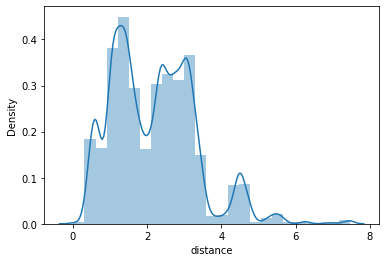

In [11]:
sns.distplot(df['distance'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [12]:
df['distance'].mean() # Check the mean

2.1868020598756157

In [13]:
df['distance'].median() # Check the median

2.15

In [14]:
df['distance'].max() # Check the max

7.46

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

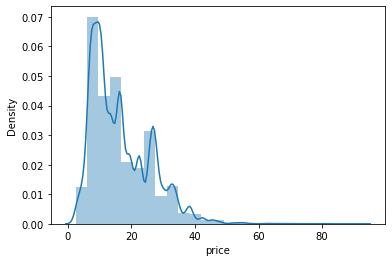

In [22]:
sns.distplot(df['price'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [23]:
df['price'].mean() # Check the mean

16.558310703404423

In [24]:
df['price'].median() # Check the median

13.5

In [25]:
df['price'].max() # Check the max

92.0

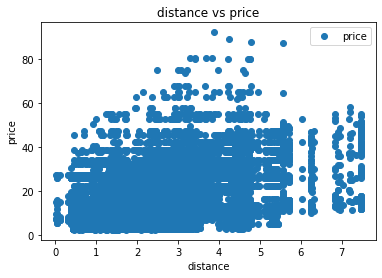

In [26]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'distance', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('distance vs price')  
plt.xlabel('distance')  
plt.ylabel('price')  
plt.show()

In [27]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['distance'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [28]:
X

array([[0.44],
       [0.44],
       [0.44],
       ...,
       [0.94],
       [0.94],
       [0.94]])

In [29]:
y

array([[ 5. ],
       [11. ],
       [ 7. ],
       ...,
       [ 7. ],
       [ 7. ],
       [ 5.5]])

In [30]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [31]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [32]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [33]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

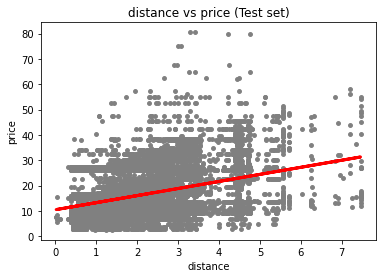

In [34]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('distance vs price (Test set)')
plot_test.xlabel('distance')
plot_test.ylabel('price')
plot_test.show()

In [35]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [36]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.78988283]]
Mean squared error:  76.77225714130677
R2 score:  0.12472503037220073


In [37]:
y_predicted

array([[11.55417043],
       [15.20891693],
       [19.11475289],
       ...,
       [19.92381891],
       [17.13393608],
       [16.93864428]])

In [38]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,9.5,11.554170
1,10.5,15.208917
2,12.5,19.114753
3,16.0,17.608216
4,16.5,19.254247
5,9.0,16.436465
6,10.5,18.975259
7,26.0,17.385026
8,30.0,14.762536
9,27.5,15.097322


In [39]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [40]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [41]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.78988283]]
Mean squared error:  76.89718501188536
R2 score:  0.11492125056539448


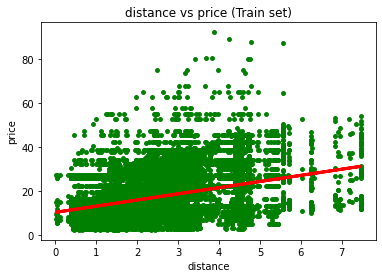

In [42]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('distance vs price (Train set)')
plot_test.xlabel('distance')
plot_test.ylabel('price')
plot_test.show()

In [43]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df[df['price'] <=70] 

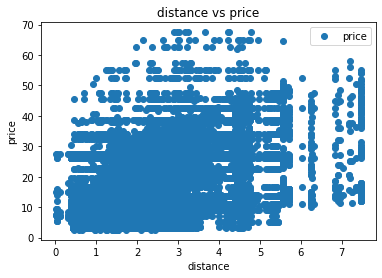

In [44]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'distance', y='price', style='o')  
plt.title('distance vs price')  
plt.xlabel('distance')  
plt.ylabel('price')  
plt.show()

In [45]:
# Reshape again.

X_2 = df_test['distance'].values.reshape(-1,1)
y_2 = df_test['price'].values.reshape(-1,1)

In [46]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [47]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [48]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [49]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [50]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.77417964]]
Mean squared error:  76.32160270883462
R2 score:  0.12239142739150533


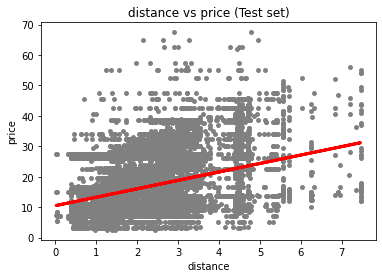

In [51]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('distance vs price (Test set)')
plot_test.xlabel('distance')
plot_test.ylabel('price')
plot_test.show()

In [52]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,10.5,22.073221
1,13.0,19.437751
2,22.5,23.266119
3,16.5,16.025510
4,38.5,20.270005
5,13.5,22.905475
6,7.0,13.528748
7,26.0,12.502302
8,33.5,20.020328
9,16.5,16.774538


In [2]:
# Hypothesis: The Uber/lyft data would suggest that there is a high correlation between distance and price.

In [ ]:
# The regression models do not support this hypothesis. The slope, MSE and R2 figures do not indicate a high coorelation.
As well, a second more detailed analysis shows a big difference between the Actual and Predicted values. 
Clearly there are other significant variables at work that are impacted price